In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools import plotting
from collections import OrderedDict
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
import statsmodels.formula as smff
import statsmodels.api as sm
import math
%matplotlib inline

C:\Users\windat059246\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
data= pd.read_csv('Car Risk.csv',index_col = 0)

# QUICKLOOK

In [8]:
data.head()

,risk,carid.1,brand,fuel,doors,bodystyle,drivewheels,wheelbase,cylinders,engsize,hp,citympg,highwaympg,price
carid,,,,,,,,,,,,,,
1376,3,1376,alfa-romero,gas,two,convertible,rwd,88.6,four,130,111,21,27,13495
1350,3,1350,alfa-romero,gas,two,convertible,rwd,88.6,four,130,111,21,27,16500
1309,1,1309,alfa-romero,gas,two,hatchback,rwd,94.5,six,152,154,19,26,16500
1342,2,1342,audi,gas,four,sedan,fwd,99.8,four,109,102,24,30,13950
1126,2,1126,audi,gas,four,sedan,4wd,99.4,five,136,115,18,22,17450


In [11]:
data = data.drop(['carid.1'],1)

In [21]:
data.head()

,risk,brand,fuel,doors,bodystyle,drivewheels,wheelbase,cylinders,engsize,hp,citympg,highwaympg,price
carid,,,,,,,,,,,,,
1376,3,alfa-romero,gas,two,convertible,rwd,88.6,four,130,111,21,27,13495
1350,3,alfa-romero,gas,two,convertible,rwd,88.6,four,130,111,21,27,16500
1309,1,alfa-romero,gas,two,hatchback,rwd,94.5,six,152,154,19,26,16500
1342,2,audi,gas,four,sedan,fwd,99.8,four,109,102,24,30,13950
1126,2,audi,gas,four,sedan,4wd,99.4,five,136,115,18,22,17450


In [13]:
data.shape

(165, 13)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 1376 to 1272
Data columns (total 13 columns):
risk           165 non-null int64
brand          165 non-null object
fuel           165 non-null object
doors          165 non-null object
bodystyle      165 non-null object
drivewheels    165 non-null object
wheelbase      165 non-null float64
cylinders      165 non-null object
engsize        165 non-null int64
hp             165 non-null int64
citympg        165 non-null int64
highwaympg     165 non-null int64
price          165 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 23.0+ KB


In [15]:
data.describe()

,risk,wheelbase,engsize,hp,citympg,highwaympg,price
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.921212,99.004848,125.793939,104.309091,24.848485,30.296970,13042.709091
std,1.334294,6.201109,37.093734,34.614007,6.086376,6.430894,7237.445125
min,-2.000000,86.600000,70.000000,52.000000,14.000000,16.000000,5118.000000
25%,0.000000,94.500000,98.000000,76.000000,19.000000,25.000000,7895.000000
50%,1.000000,97.200000,120.000000,97.000000,24.000000,30.000000,11199.000000
75%,2.000000,102.400000,141.000000,116.000000,29.000000,34.000000,16500.000000
max,3.000000,120.900000,308.000000,207.000000,49.000000,54.000000,45400.000000


In [16]:
data.isnull().sum().sort_values(ascending= False)

price          0
highwaympg     0
citympg        0
hp             0
engsize        0
cylinders      0
wheelbase      0
drivewheels    0
bodystyle      0
doors          0
fuel           0
brand          0
risk           0
dtype: int64

In [18]:
print(data.brand.unique())
print(data.fuel.unique())
print(data.doors.unique())
print(data.bodystyle.unique())
print(data.drivewheels.unique())
print(data.cylinders.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'mazda'
 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot' 'plymouth'
 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['gas' 'diesel']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['four' 'six' 'five' 'two' 'eight']


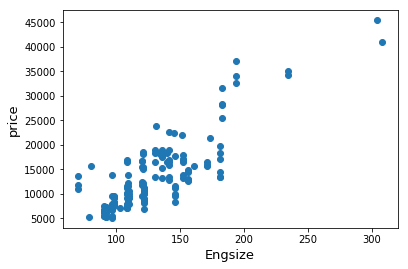

In [51]:
fig, ax = plt.subplots()
ax.scatter(x = data['engsize'], y = data['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('Engsize', fontsize=13)
plt.show()

terdapat outlier tetapi masih dalam fit line sehingga data tidak influenced terhadap model tersebut

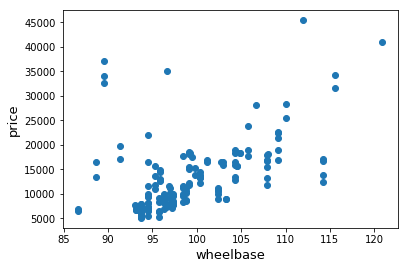

In [52]:
fig, ax = plt.subplots()
ax.scatter(x = data['wheelbase'], y = data['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('wheelbase', fontsize=13)
plt.show()

Mobil dengan ukuran wheelbase 94 - 102 berada di rentangan harga 500 - 15000 (termasuk murah)

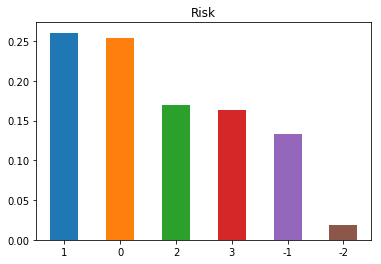

In [22]:
data['risk'].value_counts(normalize=True).plot.bar(rot=0, title='Risk')
plt.show()

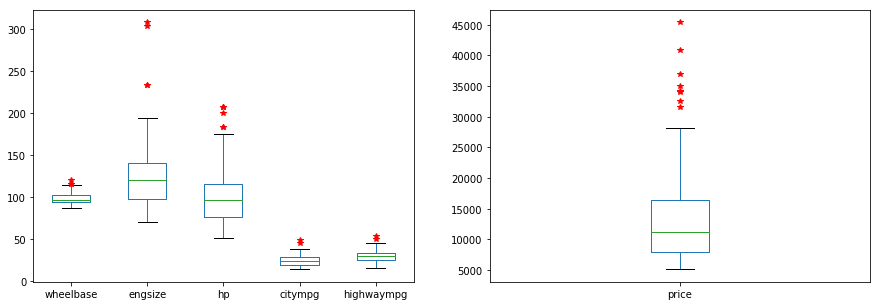

In [31]:
col_list=['wheelbase','engsize','hp','citympg','highwaympg']
data_num = data[data.columns[data.columns.isin(col_list)]]

plt.figure(figsize=(15,5))
plt.subplot(121)
data_num.boxplot(sym='r*',grid=False)
plt.subplot(122)
data.boxplot(column='price', sym='r*', grid=False)
plt.show()

In [33]:
[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]

['brand', 'fuel', 'doors', 'bodystyle', 'drivewheels', 'cylinders']

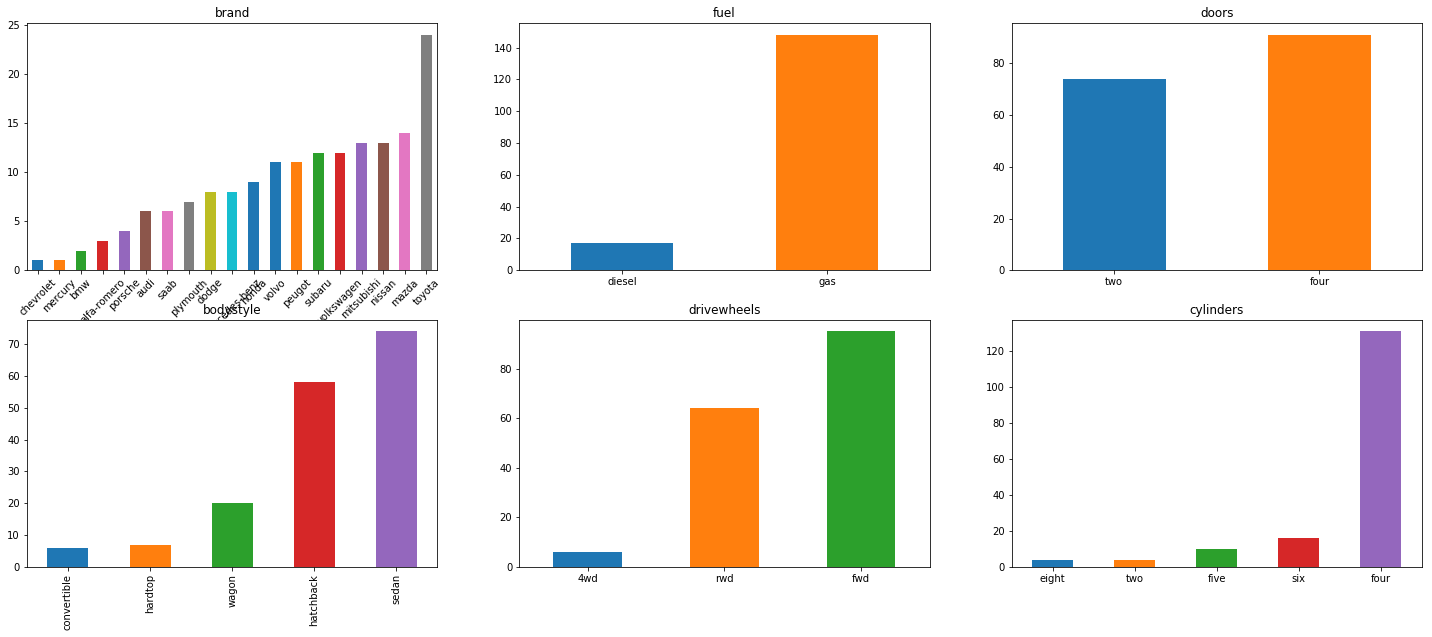

In [43]:
plt.figure(figsize=(25,10))
plt.subplot(231)
data['brand'].value_counts().sort_values(ascending= True).plot.bar(rot=45, title='brand')
plt.subplot(232)
data['fuel'].value_counts().sort_values(ascending= True).plot.bar(rot=0, title='fuel')
plt.subplot(233)
data['doors'].value_counts().sort_values(ascending= True).plot.bar(rot=0, title='doors')
plt.subplot(234)
data['bodystyle'].value_counts().sort_values(ascending= True).plot.bar(rot=90, title='bodystyle')
plt.subplot(235)
data['drivewheels'].value_counts().sort_values(ascending= True).plot.bar(rot=0, title='drivewheels')
plt.subplot(236)
data['cylinders'].value_counts().sort_values(ascending= True).plot.bar(rot=0, title='cylinders')
plt.show()

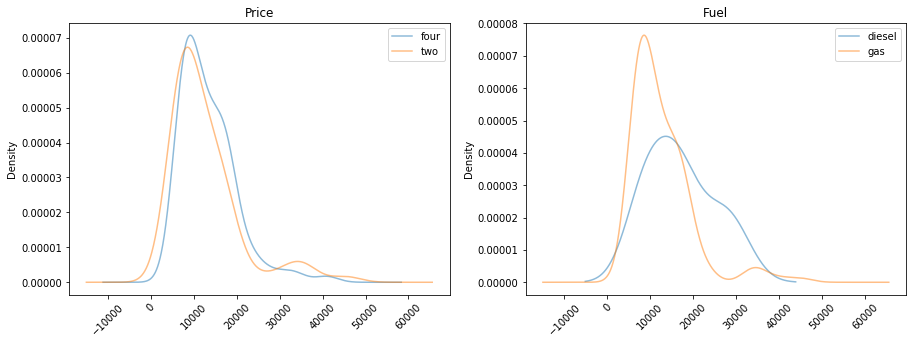

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(121)
data.groupby('doors').price.plot.density(alpha=0.5, legend=True, title='Price', rot=45)
plt.subplot(122)
data.groupby('fuel').price.plot.density(alpha=0.5, legend=True, title='Fuel', rot=45)
plt.show()

Peluang mobil berbahan bakar gas lebih tinggi daripada mobil berbahan bakar diesel pada rentangan mobil berharga 0 - 15000

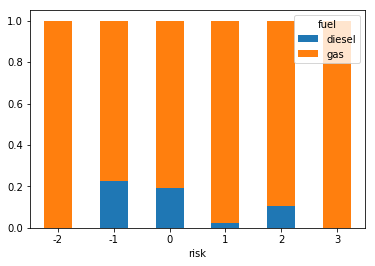

In [63]:
pd.crosstab(data['risk'], data['fuel'],normalize='index').plot.bar(rot=0,stacked=True)

Prosentase orang risk 1 lebih banyak mobilnya berbahan bakar gas, daripada berbahan bakar diesel

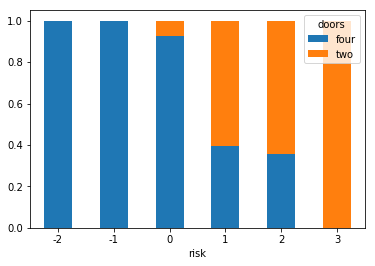

In [64]:
pd.crosstab(data['risk'], data['doors'],normalize='index').plot.bar(rot=0,stacked=True)

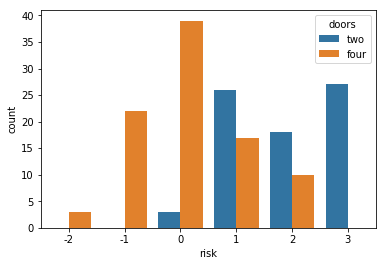

In [68]:
sns.countplot(data.risk, hue=data.doors)

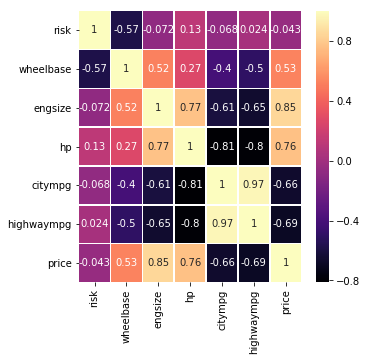

In [67]:
df = pd.DataFrame(data.corr())
plt.figure(figsize=(5,5))
sns.heatmap(df, cmap='magma', linewidths=0.5, annot=True)
plt.show()

# DATA CLEANSING

In [87]:
data['num_of_doors'] = data['num_of_doors'].fillna(method='bfill')
data['price'] = data['price'].fillna(value=data['price'].median())
data['stroke'] = data['stroke'].fillna(value=data['stroke'].median())
data['bore'] = data['bore'].fillna(value=data['bore'].median())
data['horsepower'] = data['horsepower'].fillna(value=data['horsepower'].median())
data['peak_rpm'] = data['peak_rpm'].fillna(value=data['peak_rpm'].median())

In [88]:
data.groupby(['num_of_doors']).count()

,make,fuel_type,aspiration,body_style,drive_wheel,engine_loc,wheelbase,length,width,height,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
num_of_doors,,,,,,,,,,,,,,,,,,,,,
?,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
four,115,115,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
two,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89


In [89]:
train = pd.get_dummies(data, columns=["make","fuel_type","aspiration","num_of_doors","body_style","drive_wheel","engine_loc","cylinder","fuel_system","engine_type"], drop_first=True)

In [90]:
train.head()

,wheelbase,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,...,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor
ID,,,,,,,,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,1,0,0,0,0,0,0,0,0
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,1,0,0,0,0,0,0,0,0
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,...,0,1,0,0,0,0,0,0,1,0
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,...,0,1,0,0,0,0,1,0,0,0
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,...,0,1,0,0,0,0,1,0,0,0


In [91]:
from matplotlib.pyplot import cm

In [92]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [93]:
x = train.drop(['price'],1)
y = train['price']

In [94]:
result = stepwise_selection(x, y)

print('resulting features:')
print(result)

C:\Users\windat059246\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


Add  engine_size                    with p-value 2.51119e-61
Add  drive_wheel_rwd                with p-value 3.22681e-07
Add  engine_loc_rear                with p-value 2.26013e-06
Add  width                          with p-value 1.30546e-07
Add  make_bmw                       with p-value 3.0385e-11
Add  engine_type_dohcv              with p-value 1.98425e-10
Add  make_mercedes-benz             with p-value 4.21297e-08
Add  peak_rpm                       with p-value 3.64853e-05
Add  make_jaguar                    with p-value 0.000225972
Add  make_saab                      with p-value 0.000931985
resulting features:
['engine_size', 'drive_wheel_rwd', 'engine_loc_rear', 'width', 'make_bmw', 'engine_type_dohcv', 'make_mercedes-benz', 'peak_rpm', 'make_jaguar', 'make_saab']


In [95]:
train.rename(columns={'make_mercedes-benz':'make_mercedes_benz'}, inplace=True)

# SPLITTING DATA

In [96]:
x = train[['engine_size', 'drive_wheel_rwd', 'engine_loc_rear', 'width', 'make_bmw', 'make_mercedes_benz', 'engine_type_dohcv', 'peak_rpm', 'make_jaguar', 'make_saab', 'make_isuzu']]
y = train['price']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = 123)

# LINEAR REGRESSION

In [97]:
train = train.drop([16,8])

In [98]:
train.head()

,wheelbase,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,...,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor
ID,,,,,,,,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,1,0,0,0,0,0,0,0,0
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,1,0,0,0,0,0,0,0,0
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,...,0,1,0,0,0,0,0,0,1,0
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,...,0,1,0,0,0,0,1,0,0,0
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,...,0,1,0,0,0,0,1,0,0,0


In [99]:
feature = ['engine_size', 'drive_wheel_rwd', 'engine_loc_rear', 'width', 'make_bmw', 'make_mercedes_benz', 'engine_type_dohcv', 'peak_rpm', 'make_jaguar', 'make_saab', 'make_isuzu']
x = train[feature]
y = train.price
lr = LinearRegression(normalize = True)
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [100]:
print(list(zip(['engine_size', 'drive_wheel_rwd', 'engine_loc_rear', 'width', 'make_bmw', 'make_mercedes_benz', 'engine_type_dohcv', 'peak_rpm', 'make_jaguar', 'make_saab', 'make_isuzu'],list(lr.coef_))))

[('engine_size', 65.35321318081043), ('drive_wheel_rwd', 1963.2843810690772), ('engine_loc_rear', 16851.963661693328), ('width', 1244.410617229301), ('make_bmw', 9463.4206257343), ('make_mercedes_benz', 8356.937507223543), ('engine_type_dohcv', -16835.26841146617), ('peak_rpm', 1.454295674944583), ('make_jaguar', 6672.174860966099), ('make_saab', 3238.850894919511), ('make_isuzu', 1786.29200946289)]


In [101]:
lr.score(x,y)

0.9185227241093258

In [102]:
lm = smf.ols(formula='price~engine_size+engine_loc_rear+make_bmw+make_mercedes_benz+engine_type_dohcv+peak_rpm+make_saab',data=train).fit()

In [103]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     168.3
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           4.53e-79
Time:                        05:05:10   Log-Likelihood:                -1908.9
No. Observations:                 203   AIC:                             3834.
Df Residuals:                     195   BIC:                             3860.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -1.36e+04   2758.843     -4.931      0.000    -1.9e+04   -8163.361
engine_size          136.2568      6.409     21.259      0.000     123.616     148.897
engine_loc_rear     1.186e+04   1867.179      6.351      0.000    8175.863    1.55e+04
make_bmw            8767.2874   1183.099      7.410      0.000    6433.975    1.11e+04
make_mercedes_benz  8904.7881   1283.385      6.939      0.000    6373.691    1.14e+04
engine_type_dohcv  -1.335e+04   3077.225     -4.339      0.000   -1.94e+04   -7281.899
peak_rpm               1.6678      0.483      3.453      0.001       0.715       2.620
make_saab           3445.5100   1247.250      2.762      0.006     985.678    5905.342
==============================================================================
Omnibus:                       31.476   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.790
Skew:                           0.977   Prob(JB):                     8.42e-10
Kurtosis:                       4.061   Cond. No.                     7.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5,1,'Plot Residual Normality')

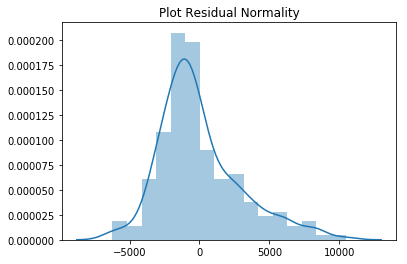

In [104]:
sns.distplot(lm.resid, hist=True)
plt.title("Plot Residual Normality")

# HOMOSKEDASITAS

In [105]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

test = sms.het_goldfeldquandt(lm.resid, lm.model.exog)
#exog : efek dari luar
test

(0.8601468845691069, 0.769066311700945, 'increasing')

P-VALUE = 0.9183362928092176 > 0.05, SEHINGGA H0 TIDAK DITOLAK, SEHINGGA ERROR TERM HOMOSCEDACITY

T-TEST = 0.7489118004186113

hasil model exog : (efek potensi luarnya) increasing

# MULTIKOLINEARITAS (VIF)

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
stepwise=train[['engine_size', 'drive_wheel_rwd', 'engine_loc_rear','make_bmw', 'make_mercedes_benz', 'engine_type_dohcv', 'peak_rpm', 'make_jaguar', 'make_saab', 'make_isuzu']]
#check for multicolinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(stepwise.values, i) for i in range(stepwise.shape[1])]
vif["features"] = stepwise.columns
vif.round(1)

,VIF Factor,features
0,22.8,engine_size
1,2.5,drive_wheel_rwd
2,1.1,engine_loc_rear
3,1.2,make_bmw
4,1.7,make_mercedes_benz
5,1.0,engine_type_dohcv
6,16.2,peak_rpm
7,1.5,make_jaguar
8,1.1,make_saab
9,1.0,make_isuzu


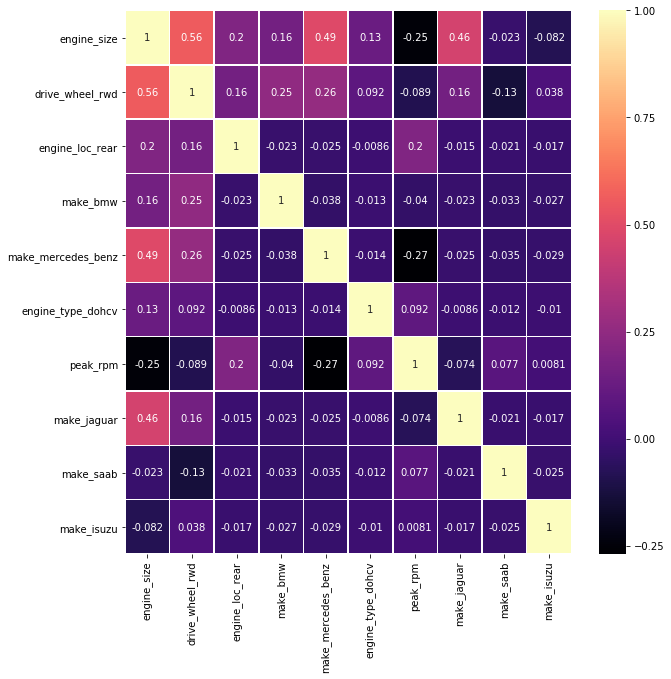

In [108]:
corr = stepwise.corr()
df = pd.DataFrame(stepwise.corr())
plt.figure(figsize=(10,10))
sns.heatmap(df, cmap='magma', linewidths=0.5, annot=True)
plt.show()

# SHAPIRO

In [109]:
from scipy import stats
stats.shapiro(lm.resid)

(0.9341141581535339, 6.046351330724065e-08)

# STUDENTIZED RESIDUAL

In [110]:
influence = lm.get_influence()
resid_student = influence.resid_studentized_external
resid = pd.concat([train_x, pd.Series(resid_student, name ="Studentized Residual")], axis = 1)
resid.head()

C:\Users\windat059246\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)


,engine_size,drive_wheel_rwd,engine_loc_rear,width,make_bmw,make_mercedes_benz,engine_type_dohcv,peak_rpm,make_jaguar,make_saab,make_isuzu,Studentized Residual
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.349835
1,130.0,1.0,0.0,64.1,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,1.360091
2,130.0,1.0,0.0,64.1,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,0.352994
3,152.0,1.0,0.0,65.5,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,1.184934
4,109.0,0.0,0.0,66.2,0.0,0.0,0.0,5500.0,0.0,0.0,0.0,1.125784


In [111]:
resid.loc[np.abs(resid["Studentized Residual"])>3,:]

,engine_size,drive_wheel_rwd,engine_loc_rear,width,make_bmw,make_mercedes_benz,engine_type_dohcv,peak_rpm,make_jaguar,make_saab,make_isuzu,Studentized Residual
7,136.0,0.0,0.0,71.4,0.0,0.0,0.0,5500.0,0.0,0.0,0.0,3.616646
14,164.0,1.0,0.0,64.8,1.0,0.0,0.0,4250.0,0.0,0.0,0.0,3.233253


In [112]:
#indeks influencial
ind = resid.loc[np.abs(resid["Studentized Residual"])>3,:].index

In [113]:
train_x.drop(ind)
train_y.drop(ind)

ID
198    16515.0
113    16900.0
96      7799.0
170     9989.0
185     7995.0
180    15998.0
38      7895.0
86      6989.0
174     8948.0
197    15985.0
101     9549.0
25      6229.0
111    13860.0
126    22018.0
34      6529.0
24      7957.0
134    12170.0
167     9538.0
42     12945.0
181    15690.0
91      7099.0
129    37028.0
82      8499.0
78      6189.0
80      7689.0
184     7975.0
192    13295.0
176     9988.0
122     6692.0
9      23875.0
        ...   
179    16558.0
203    21485.0
40      8845.0
85     14489.0
3      16500.0
56     10945.0
50     36000.0
69     28248.0
196    13415.0
165     8238.0
79      6669.0
200    18950.0
154     6918.0
112    15580.0
175    10698.0
33      5399.0
74     40960.0
48     32250.0
204    22470.0
114    16695.0
97      7499.0
58     13645.0
124     8921.0
107    18399.0
84     14869.0
18     36880.0
99      8249.0
67     18344.0
127    32528.0
110    12440.0
Name: price, Length: 162, dtype: float64

In [114]:
list(train.columns.values)

['wheelbase',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_jaguar',
 'make_mazda',
 'make_mercedes_benz',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_porsche',
 'make_renault',
 'make_saab',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'fuel_type_gas',
 'aspiration_turbo',
 'num_of_doors_four',
 'num_of_doors_two',
 'body_style_hardtop',
 'body_style_hatchback',
 'body_style_sedan',
 'body_style_wagon',
 'drive_wheel_fwd',
 'drive_wheel_rwd',
 'engine_loc_rear',
 'cylinder_five',
 'cylinder_four',
 'cylinder_six',
 'cylinder_three',
 'cylinder_twelve',
 'cylinder_two',
 'fuel_system_2bbl',
 'fuel_system_4bbl',
 'fuel_system_idi',
 'fuel_system_mfi',
 'fuel_system_mpfi',
 'fuel_system_spdi',
 

In [115]:
lmall = smf.ols(formula='price~wheelbase+length+width+height+curb_weight+engine_size+bore+stroke+compression_ratio+horsepower+peak_rpm+city_mpg+highway_mpg+price+make_audi+make_bmw+make_chevrolet+make_dodge+make_honda+make_isuzu+make_jaguar+make_mazda+make_mercedes_benz+make_mercury+make_mitsubishi+make_nissan+make_peugot+make_plymouth+make_porsche+make_renault+make_saab+make_subaru+make_toyota+make_volkswagen+make_volvo+fuel_type_gas+aspiration_turbo+num_of_doors_four+num_of_doors_two+body_style_hardtop+body_style_hatchback+body_style_sedan+body_style_wagon+drive_wheel_fwd+drive_wheel_rwd+engine_loc_rear+cylinder_five+cylinder_four+cylinder_six+cylinder_three+cylinder_twelve+cylinder_two+fuel_system_2bbl+fuel_system_4bbl+fuel_system_idi+fuel_system_mfi+fuel_system_mpfi+fuel_system_spdi+fuel_system_spfi+engine_type_dohcv+engine_type_l+engine_type_ohc+engine_type_ohcf+engine_type_ohcv+engine_type_rotor',data=train).fit()

In [116]:
lmall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.131e+28
Date:                Fri, 22 Jun 2018   Prob (F-statistic):               0.00
Time:                        05:05:12   Log-Likelihood:                 4551.3
No. Observations:                 203   AIC:                            -8979.
Df Residuals:                     141   BIC:                            -8773.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.821e-11   3.33e-10      0.175      0.861   -5.99e-10    7.16e-10
wheelbase             8.527e-13   2.75e-12      0.310      0.757   -4.58e-12    6.29e-12
length               -3.126e-13   1.54e-12     -0.203      0.840   -3.36e-12    2.73e-12
width                 4.547e-13   7.35e-12      0.062      0.951   -1.41e-11     1.5e-11
height               -6.821e-13   4.26e-12     -0.160      0.873    -9.1e-12    7.74e-12
curb_weight           1.066e-14   5.31e-14      0.201      0.841   -9.44e-14    1.16e-13
engine_size          -1.137e-13   7.97e-13     -0.143      0.887   -1.69e-12    1.46e-12
bore                  3.638e-12   5.69e-11      0.064      0.949   -1.09e-10    1.16e-10
stroke               -4.547e-12   3.05e-11     -0.149      0.882   -6.49e-11    5.58e-11
compression_ratio    -1.819e-12    1.5e-11     -0.121      0.904   -3.15e-11    2.78e-11
horsepower            1.421e-14   7.35e-13      0.019      0.985   -1.44e-12    1.47e-12
peak_rpm             -1.332e-14   2.08e-14     -0.639      0.524   -5.45e-14    2.79e-14
city_mpg             -5.684e-13    4.1e-12     -0.139      0.890   -8.67e-12    7.53e-12
highway_mpg           5.684e-13   3.51e-12      0.162      0.871   -6.36e-12     7.5e-12
price                    1.0000   2.33e-15    4.3e+14      0.000       1.000       1.000
make_audi             2.501e-11   6.68e-11      0.374      0.709   -1.07e-10    1.57e-10
make_bmw             -2.728e-12   7.18e-11     -0.038      0.970   -1.45e-10    1.39e-10
make_chevrolet        2.456e-11    6.9e-11      0.356      0.722   -1.12e-10    1.61e-10
make_dodge            1.182e-11   5.76e-11      0.205      0.838   -1.02e-10    1.26e-10
make_honda            2.467e-11   6.64e-11      0.371      0.711   -1.07e-10    1.56e-10
make_isuzu            7.731e-12   6.19e-11      0.125      0.901   -1.15e-10     1.3e-10
make_jaguar          -5.457e-12   8.53e-11     -0.064      0.949   -1.74e-10    1.63e-10
make_mazda           -3.638e-12   5.22e-11     -0.070      0.945   -1.07e-10    9.96e-11
make_mercedes_benz    3.638e-12   7.67e-11      0.047      0.962   -1.48e-10    1.55e-10
make_mercury         -3.638e-12   8.97e-11     -0.041      0.968   -1.81e-10    1.74e-10
make_mitsubishi       2.274e-12   5.75e-11      0.040      0.968   -1.11e-10    1.16e-10
make_nissan           7.731e-12   5.15e-11      0.150      0.881    -9.4e-11     1.1e-10
make_peugot               1e-11   5.82e-11      0.172      0.864   -1.05e-10    1.25e-10
make_plymouth             1e-11   5.73e-11      0.175      0.862   -1.03e-10    1.23e-10
make_porsche         -1.273e-11   8.93e-11     -0.143      0.887   -1.89e-10    1.64e-10
make_renault              1e-11   6.92e-11      0.145      0.885   -1.27e-10    1.47e-10
make_saab             7.731e-12   6.09e-11      0.127    

In [117]:
influence = lmall.get_influence()
resid_student = influence.resid_studentized_external
resid = pd.concat([train_x, pd.Series(resid_student, name ="Studentized Residual")], axis = 1)
resid.head()

C:\Users\windat059246\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)


,engine_size,drive_wheel_rwd,engine_loc_rear,width,make_bmw,make_mercedes_benz,engine_type_dohcv,peak_rpm,make_jaguar,make_saab,make_isuzu,Studentized Residual
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.483204
1,130.0,1.0,0.0,64.1,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,-0.249956
2,130.0,1.0,0.0,64.1,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,-2.842953
3,152.0,1.0,0.0,65.5,0.0,0.0,0.0,5000.0,0.0,0.0,0.0,-3.471678
4,109.0,0.0,0.0,66.2,0.0,0.0,0.0,5500.0,0.0,0.0,0.0,-1.088376


In [121]:
train['wheelbase']

ID
1       88.6
2       88.6
3       94.5
4       99.8
5       99.4
6       99.8
7      105.8
9      105.8
10      99.5
11     101.2
12     101.2
13     101.2
14     101.2
15     103.5
17     103.5
18     110.0
19      88.4
20      94.5
21      94.5
22      93.7
23      93.7
24      93.7
25      93.7
26      93.7
27      93.7
28      93.7
29     103.3
30      95.9
31      86.6
32      86.6
       ...  
176    102.4
177    102.4
178    102.4
179    102.9
180    102.9
181    104.5
182    104.5
183     97.3
184     97.3
185     97.3
186     97.3
187     97.3
188     97.3
189     97.3
190     94.5
191     94.5
192    100.4
193    100.4
194    100.4
195    104.3
196    104.3
197    104.3
198    104.3
199    104.3
200    104.3
201    109.1
202    109.1
203    109.1
204    109.1
205    109.1
Name: wheelbase, Length: 203, dtype: float64

In [120]:
data = train 
numeric_feats = data.dtypes[data.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

NameError: ("name 'skew' is not defined", 'occurred at index wheelbase')